# Hands On Regression Analysis

Scopes:
  * Recap of linear regression
  * Loss function of a LR model
  * Learning with Gradient Descent
  * Applying the above techniques to the [US housing data](https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv) using [Pytorch](https://pytorch.org/).


In [156]:
# We will be using the following packages
import torch
import torch.nn as nn
from torch.optim import SGD
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px

# Recap of linear regression

Linear Regression (LR) is one of the simplest machine learning model for predicting continuous outcomes (e.g. time, length). As shown in the figure below, LR tries to learn the statistics (patterns) that exist in a dataset by trying to draw the best fitted line to the data.

<p align="center">
    <img width="75%" src="https://upload.wikimedia.org/wikipedia/commons/3/3a/Linear_regression.svg"> 
</p>

## Model formulation

Linear regression is a supervised learning model. We are given a sequence of **dependent variable** $(\mathbf x^{(i)})_{i=1}^N$ and the corresponding **labels** $(y^{(i)})_{i=1}^N$, where each dependent variable $\mathbf x^{(i)}$ is a $M$-dimensional vector of the form

$$
\mathbf x^{(i)} = (x_1^{(i)}, x_2^{(i)}, \cdots, x_M^{(i)}),
$$

and each label $y^{(i)}$ is a real number. Then the linear regression model has the form (for convenience we define $x^{(i)}_0=1$)

\begin{equation}
f_{\theta}(\mathbf{x}^{(i)}) = \theta_{0} + \theta_{1}x_{1} + ... + \theta_{M}x_{M} = \sum_{k = 0}^{M}{ \theta_{k} x_{k}^{(i)} },
\end{equation}

where the $\theta_i$'s are parameters of the model to be determined by fitting the model to the given data. Our goal is to find the 'best' parameters $\hat{\theta}_i$ such that $f_{\hat{\theta}}(\mathbf x^{(i)})\sim y^{(i)}$.

## Loss function

We find $\hat{\theta}$ by minimizing the **Mean Square Error** $ J(\theta) $ between $f_{\theta}(\mathbf{x})$ and $y$:

\begin{equation}
J(\theta) =  \frac{1}{2N} \sum_{i = 1}^{N} \left( f_\theta(\mathbf{x}^{(i)}) - y^{(i)} \right)^2.
\end{equation}

This function $J(\theta)$ is called a **loss function**.


## To matrix form

It is often conventient to re-respresent math equations that deals with large amount of data as concise matrix operations. Therefore, the euations above can be re-written as (recall we have $\mathbf{x}^{(i)}=(1,x^{(i)}_1,\cdots, x^{(i)}_M)$):

\begin{equation}
f_{\theta}(\mathbf{x}^{(i)}) = \mathbf{\theta}^\intercal \mathbf{x}^{(i)},
\end{equation}


\begin{equation}
J(\theta) =  \frac{1}{2N} (\mathbf{X}\mathbf{\theta} - \mathbf{Y})^\intercal (\mathbf{X}\mathbf{\theta} - \mathbf{Y})
\end{equation}

where $\mathbf{X}\in \mathbb{R}^{N \times (M+1)} $ and $\mathbf{Y} \in \mathbb{R}^{N \times 1}$ are matrix representations of training input variables  $\{{\mathbf{x}^{(i)}}\}_{i = 1}^{N}$ and prediction variables $\{{y^{(i)}}\}_{i = 1}^{N}$ respectively.


## Finding the best $\hat{\theta}$

We minimize the loss function to obtain the best $\hat{\theta}$:

\begin{equation}
\hat{\theta} = \arg\min_{\theta} J(\theta).
\end{equation}

Here we introduce two ways to minimize the fuction: 1) by Gradient Descent: a first-order iterative optimization algorithm; 2) by solving the Loss function's first-order derivative equation. 


<table><tr>

<td> <img src="https://rasbt.github.io/mlxtend/user_guide/general_concepts/gradient-optimization_files/ball.png" alt="Drawing" style= width="200" height="200"/> </td>

<td> <img src="https://hackernoon.com/hn-images/1*f9a162GhpMbiTVTAua_lLQ.png" alt="Drawing" stylewidth="200" height="200"/> </td>

</tr></table>

### 1) Gradient Descent

Gradient Descent finds the minimum of a loss function by repeatly taking steps in the opposite direction of the gradient of the function, because this is the direction of steepest descent. Overtime, the weights of the model navigates to a point where the loss is very close to its minimum.

Formally, given a parameter $\theta_{t}$ at time $t$, we compute the next parameter $\theta_{t+1}$ as :

\begin{equation} 
\theta_{t+1} \leftarrow \theta_{t} - \eta * \nabla_{\theta} J(\theta_{t})
\end{equation}

where $\eta$ is a learning rate usually set within $[0.00001, 0.1]$ and $\nabla_{\theta} J(\theta_{t}) $ is the Jacobian of the loss function

\begin{equation}
\nabla_{\theta} J = [\frac{\partial J(\theta)}{\partial \theta_0}, \frac{\partial J(\theta)}{\partial \theta_1}, ..., \frac{\partial J(\theta)}{\partial \theta_M}]^\intercal = \frac{1}{N}\mathbf X^\intercal (\mathbf X\theta - \mathbf Y).
\end{equation}

evaluated at $\theta_t$.

### 2) Solving the Loss function's first-order derivative equation

One advantage of linear regression is that its loss function's first-order derivative equation is solvable. Using the differentiation rules, we can easily get the function's first-order derivative equation:

\begin{equation}
\frac{\partial J(\theta)}{\partial \theta_k} = \sum_i \mathbf{x}^{(i)}_k \left(f_\hat{\theta}(\mathbf{x}^{(i)}) - y^{(i)}\right) = 0,\quad k=0,1,\cdots, M.
\end{equation}

Solving these first-order equations gives

\begin{equation}
\hat{\mathbf{\theta}} = (\mathbf{X}^\intercal \mathbf{X})^{-1}\mathbf{X}^\intercal \mathbf{Y}.
\end{equation}





-----
-----
# Linear Regression in Python

For this tutorial, we will use Python with Pytorch API to implement linear regression. [Pytorch](https://pytorch.org/) is a Deep learning framework developed by facebook to accelerate Deep learning research.

## Basic math operations in Pytorch

Pytorch provides many useful basic matrix operations such as multiplication, transpose, inversion etc. **To use these operations we first need to  declare our data as a tensor datatype**.

In [27]:
# call a package
import torch 

# generate a random tensor
X1 = torch.randn(2,2)
print(X1)

tensor([[-0.7706, -0.1971],
        [ 1.2348, -2.0265]])


In [28]:
# Pointwise multiplication
O0 = X1*X1
print(O0)

tensor([[0.5938, 0.0388],
        [1.5248, 4.1067]])


In [29]:
# transpose
O1 = X1.t()
print(O1)

tensor([[-0.7706,  1.2348],
        [-0.1971, -2.0265]])


In [30]:
# matrix multiplication
O2 = X1 @ torch.transpose(X1, 1, 0) 
print(O2)

tensor([[ 0.6326, -0.5521],
        [-0.5521,  5.6315]])


In [31]:
# inverse
O3 = X1.inverse()
print(O3)

tensor([[-1.1228,  0.1092],
        [-0.6842, -0.4269]])


--------
Now, lets convert maths to codes

1. Inference :
\begin{equation}
f_{\theta}(\mathbf{X}) = f( \mathbf{X} ;\theta )  = \mathbf{X}\mathbf{\theta}
\end{equation}


In [32]:
def f(X, Theta):
    return X @ Theta

2. Loss:
\begin{equation}
J(\theta) = \frac{1}{2N} (\mathbf{X}\mathbf{\theta} - \mathbf{Y})^\intercal(\mathbf{X}\mathbf{\theta} - \mathbf{Y})
\end{equation}


In [33]:
# YHat is X @ Theta
def J(Y, YHat):
    N = Y.shape[0]
    tmp = YHat-Y
    loss = ( tmp.t() @ tmp ) / (2*N)
    return loss.squeeze()

3. Jacobian

\begin{equation}
\nabla_{\theta} J(\theta_{t}) = \frac{1}{N}\mathbf{X}^\intercal (f_{\theta_t}(\mathbf X) - \mathbf{Y})
\end{equation}



In [34]:
def jacob(X, Y, YHat):
    N = Y.shape[0]
    return X.t() @ (YHat - Y)/N

4. Gradient Descent


\begin{equation}
\theta_{t+1} \leftarrow \theta_{t} - \eta * \nabla_{\theta} J(\theta_{t}) 
\end{equation}

<!-- \begin{equation}
\theta_{0} \sim N(0,\frac{I^{M \times M}}{M})
\end{equation} -->


In [35]:
def GD(X, Y, lr = 0.00001, nIter = 1000):

    N, M = X.shape

    for n in range(nIter):

        if n == 0 : ThetaNow = torch.randn(M,1)/M
        else      : ThetaNow = ThetaNext    

        ThetaNext = ThetaNow - lr*jacob(X, Y, f(X, ThetaNow))

    Theta = ThetaNext

    return Theta

5. Batch Gradient Descent

   In practice, the size of data $ \{(\mathbf{x}^{(i)}, y^{(i)} )\}_{i = 1}^{N} $ could be so large that it can't fit into a computer's memory. An alternative is to randomly sample a subset (batch) of the dataset for every interation. We call this technique as **Batch Gradient Descent**. Bigger batch size is prefered for a faster and more stable training.

In [36]:
import numpy as np 

def BGD(X, Y,
        lr = 0.00001,
        nIter = 1000,
        batchProportion = 0.1 # 10 percent
        ):

    N, M = X.shape

    batchSize = int(N * batchProportion)

    for n in range(nIter):

        if n == 0 : ThetaNow = torch.randn(M,1)/M
        else      : ThetaNow = ThetaNext

        idx = np.random.choice(range(N), size=batchSize)

        X_batch = X[idx]
        Y_batch = Y[idx]

        ThetaNext = ThetaNow - lr*jacob(X_batch, Y_batch, f(X_batch, ThetaNow))

    Theta = ThetaNext

    return Theta

6. Batch Gradient descent with momentum

    Graident Descent algorithm is memeryless: its weight update rule solely depends on the gradient $ \nabla_{\theta} J(\theta_{t}) $ that is computed at time $t$. As a result GD tends to oscillate across non-informative slopes while only making small progress towards reaching the good local minima. 

    Momentum is a method that helps accelerate GD in the relevant direction and dampens oscillations. It does this by caching previous updates with a constant $\gamma$ :

    \begin{equation}
    v_{t+1} \leftarrow \gamma v_{t} + \eta * \nabla_{\theta} J(\theta_{t}) \;\;\;\;\;\;\ (Step \; 1)
    \end{equation}
    \begin{equation}
    \theta_{t+1} \leftarrow \theta_{t} -v_{t+1} \;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\ (Step \; 2)
    \end{equation}
<!--     \begin{equation}
    \theta_{0} \sim N(0,\frac{I^{M \times M}}{M})
    \end{equation}
    \begin{equation}
    v_{0} = 0^{1 \times M}
    \end{equation}
 -->



In [37]:
import numpy as np 

def MBGD(X, Y,
         lr = 0.00001,
         gamma  = 0.9,
         nIter = 1000,
         batchProportion = 0.1 # 10 percent
        ):

    N, M = X.shape

    batchSize = int(N * batchProportion)

    for n in range(nIter):

        if n == 0 : 
            ThetaNow = torch.randn(M,1)/M
            VNow     = torch.zeros(M,1)
        else      : 
            ThetaNow = ThetaNext
            VNow     = VNext

        idx = np.random.choice(range(N), size=batchSize)
    
        X_batch = X[idx]
        Y_batch = Y[idx]
    

        VNext = gamma*VNow + lr*jacob(X_batch, Y_batch, f(X_batch, ThetaNow))    
        ThetaNext = ThetaNow - VNext
    
    Theta = ThetaNext

    return Theta

7. closed form solver

\begin{equation}
\hat{\mathbf{\theta}} = (\mathbf{X}^{\intercal}\mathbf{X})^{-1}\mathbf{X}^{\intercal}\mathbf{Y}
\end{equation}


In [38]:
def CF(X, Y):
    return (X.t() @ X).inverse() @ X.t() @ Y

## An Example Using the California Housing Dataset

This [dataset](https://online.stat.psu.edu/stat462/sites/onlinecourses.science.psu.edu.stat462/files/data/poverty/index.txt) is a modified version of the California Housing dataset available from Luís Torgo's page (University of Porto). Luís Torgo obtained it from the StatLib repository (which is closed now). The dataset may also be downloaded from StatLib mirrors.

This dataset appeared in a 1997 paper titled Sparse Spatial Autoregressions by Pace, R. Kelley and Ronald Barry, published in the Statistics and Probability Letters journal. They built it using the 1990 California census data. It contains one row per census block group. A block group is the smallest geographical unit for which the U.S. Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people).

<p align="center">
    <img width="100%" src="https://www.geocurrents.info/wp-content/uploads/2016/01/California-Average-Home-Price-Map.png"> 
</p>


### Download and Process the Dataset

In [39]:
import pandas as pd

url = "https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv"
df = pd.read_csv(url)
df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [40]:
# We drop entries with missing values
df = df.dropna(how='any')
df.describe(include='all')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1H OCEAN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9034
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155,NaN
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099,NaN
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,NaN
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000,NaN
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000,NaN
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000,NaN


Now lets do feature selection and preprocessing

In [41]:
conX = df[ ["longitude",
            "latitude",
            "total_rooms",
            "total_bedrooms",
            "population", 
            "households"]].apply(lambda x: (x-x.mean()) / x.std(), axis=0)

catX = pd.get_dummies( df["ocean_proximity"], prefix='ocean_proximity', drop_first=True)
 

X = pd.concat([conX, catX] , axis = 1)
X["bias"] = 1

Y = df[["median_house_value"]].apply(lambda x: (x-x.mean())/ x.std(), axis=0)
X = torch.tensor(X.to_numpy()).type(torch.float32)
Y = torch.tensor(Y.to_numpy()).type(torch.float32)

In [42]:
print(X.shape)

torch.Size([20433, 11])


In [43]:
print(Y.shape)

torch.Size([20433, 1])


We are all set! We have the $\mathbf{X}$ and $\mathbf{Y}$ which are the only inputs required for training our LR model. Lets start training.

In [56]:
from time import time

# We use the first 80% data for training,
# and test model performance on the remaining
# 20% data

XTrain, XTest = X[: int(len(X) * 0.8) ], X[int(len(X) * 0.8) + 1 :]
YTrain, YTest = Y[: int(len(X) * 0.8) ], Y[int(len(X) * 0.8) + 1 :]

# A random parameter
ThetaRandom = torch.randn(XTest.shape[1], 1)

print("training with GD ...")
start = time()
ThetaGD = GD(XTrain, YTrain , lr=1e-01, nIter=1000)
end = time()
print(f"took { str(end - start)[:7] } seconds")


print("training with BGD ...")
start = time()
ThetaBGD = BGD(XTrain, YTrain, lr=1e-01, nIter=1000, batchProportion = 0.01)
end = time()
print(f"took { str(end - start)[:7] } seconds")

print("training with MBGD ...")
start = time()
ThetaBGD = MBGD(XTrain, YTrain, lr=1e-01, nIter=1000, batchProportion = 0.01)
end = time()
print(f"took { str(end - start)[:7] } seconds")

print("training with CF ...")
start = time()
ThetaCF = CF(XTrain, YTrain)
end = time()
print(f"took { str(end - start)[:7] } seconds")



training with GD ...
took 0.06921 seconds
training with BGD ...
took 1.44638 seconds
training with MBGD ...
took 1.37996 seconds
training with CF ...
took 0.00054 seconds


In [57]:
YHatTestRandom = f(XTest, ThetaRandom)
YHatTestGD     = f(XTest, ThetaGD)
YHatTestBGD    = f(XTest, ThetaBGD)
YHatTestMBGD   = f(XTest, ThetaBGD)
YHatTestCF     = f(XTest, ThetaCF)

print( f"testLoss with random : {J(YTest,YHatTestRandom)}" )
print( f"testLoss with GD     : {J(YTest,YHatTestGD)}" )
print( f"testLoss with BGD    : {J(YTest,YHatTestBGD)}" )
print( f"testLoss with MBGD   : {J(YTest,YHatTestMBGD)}" )
print( f"testLoss with CF     : {J(YTest,YHatTestCF)}" )

testLoss with random : 4.123236179351807
testLoss with GD     : 0.2877228558063507
testLoss with BGD    : 0.291718065738678
testLoss with MBGD   : 0.291718065738678
testLoss with CF     : 0.28757646679878235


---
---
---

# Hands On Logistic Regression Analysis

Scopes:
  * Recap of logistic regression
  * Learning with Gradient Descent
  * Applying the above techniques to the [Breast cancer wisconsin (diagnostic) dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-dataset) using [Pytorch](https://pytorch.org/).


## Recap of Logistic Regression

Logistic regression is a binary **classification** model that fits data $\{(\mathbf x^{(i)}, y^{(i)})\}$ with binary labels $y^{(i)}\in \{0,1\}$. Mathematically the model with parameter $\theta$ has the form

$$
f_\theta(\mathbf x) = \sigma(\theta^\intercal \mathbf x),
$$

where $\sigma$ is the **sigmoid function** defined by

$$
\sigma(\xi) = \frac{1}{1+\exp(-\xi)}.
$$

<p align="center">
    <img width="50%" src="https://miro.medium.com/max/1280/0*gKOV65tvGfY8SMem.png"> 
</p>

Output of $f_\theta$ has range $(0,1)$.
- $f_\theta(\mathbf x)$ gives the **probability** that the label $y$ for $\mathbf x$ is $1$.
- One usually use the threshold $T=0.5$ to make a binary prediction: the prediction is $0$ if $f_\theta(\mathbf x)\leq 0.5$, and the prediction is $1$ if $f_\theta(\mathbf x)>0.5$.

For the logistic regression model, one usually use the **binary cross entropy** as the loss function

$$
J(\theta) = \sum_{i=1}^{N}\left[-  y^{(i)}\log( \sigma(\theta^{\intercal}x^{(i)}) ) - (1-y^{(i)})\log (1 - \sigma(\theta^{\intercal}x^{(i)})) \right].
$$

- Unlike the linear regression model, we do not have a close form solution for minimizer of the loss function of the logistic regression model.

- The Jacobian of the binary cross entropy is complicated. We will use PyTorch to automatically calculate derivatives for us.

## Logistic Regression in Python

The logistic regression model $f_\theta(x)=\sigma(\theta^\intercal x)$ is a composition of a linear model ($\theta^\intercal x$) and the sigmoid function ($\sigma$). This can be easily expressed in PyTorch.

In [79]:
inSize, outSize = 31, 1

model = nn.Sequential(nn.Linear(inSize, outSize), # innner product
                      nn.Sigmoid())               # sigmoid

Instread of using hand-crafted functions, now we use build-in optimizer to perform GD.

In [80]:
# binary cross entrophy loss
J = nn.BCELoss()

# SGD optimizer in PyTorch
optimizer = SGD(model.parameters(),
                lr = 0.01,
                momentum = 0.5)

## Breast cancer wisconsin (diagnostic) dataset

We use the Breast cancer wisconsin (diagnostic) dataset provided in the Python module `sklearn` to demonstrate training a logistic model. Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass to describe charateristics of the cell nulcei present in the image.

- 569 instances
- dependent variable $\mathbf x$ has 30 dimensions
    - radius
    - texture, smoothnes
    - perimeter, area
    - ...
- label $y$ has two classes
    - $0$ for benign (357 instances)
    - $1$ for malignant (212 instances)

In [81]:
from sklearn import datasets

d = datasets.load_breast_cancer()
df = pd.DataFrame(data = d.data, columns=d.feature_names)
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [138]:
# Standardize the data, and
# convert to torch.tensor datatype.
df = pd.DataFrame(data = d.data, columns=d.feature_names)
df = df.apply(lambda x: (x-x.mean()) / x.std(), axis=0)
df.insert(loc=0, column='bias', value=1)
x = torch.tensor(df.to_numpy()).type(torch.float32)
y = torch.tensor(d.target).type(torch.float32)
y = y.reshape(-1,1)

Let us randomly split the data into training and testing dataset.

In [139]:
nCases = x.shape[0]
nCases_shuffled = torch.randperm(nCases)
train_ratio = 0.8
train_list = nCases_shuffled[:int(train_ratio*nCases)]
test_list = nCases_shuffled[int(train_ratio*nCases):]

x_train, x_test = x[train_list], x[test_list]
y_train, y_test = y[train_list], y[test_list]

### Model Performence: Pre-training

Parameters in our `model` defined above are randomly initialized by PyTorch. Let us visualize how our model performs on the testing dataset. 

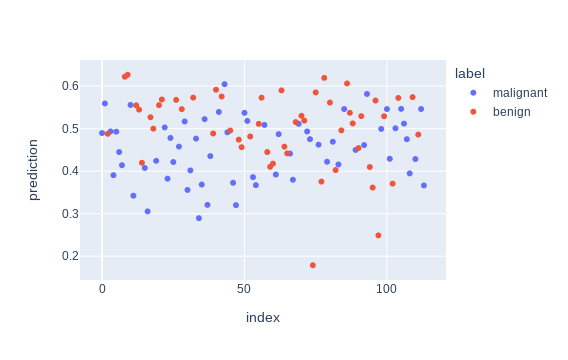

In [152]:
inSize, outSize = 31, 1
model = nn.Sequential(nn.Linear(inSize, outSize), # innner product
                      nn.Sigmoid())               # sigmoid
hat_y_test = model(x_test).detach()
label = y_test.squeeze().type(torch.bool)
label = ['malignant' if tmp else 'benign' for tmp in label]

df_pretrain = pd.DataFrame({'prediction':hat_y_test.squeeze(),
                            'label':label
                           }
                          )

fig = px.scatter(data_frame=df_pretrain,
                 y='prediction',
                 color='label',
                 labels={True:'malignant',
                         'benign':False})
fig.show()

We can see that the predictions are like random guessing.

### Model Training

Now we are ready to use Gradient Descent to train the model for 1000 iterations.

In [153]:
nIter = 1000
loss_record = []

import torch.nn as nn

inSize, outSize = 31, 1

model = nn.Sequential(nn.Linear(inSize, outSize), # innner product
                      nn.Sigmoid())               # sigmoid

from torch.optim import SGD

# binary cross entrophy loss
J = nn.BCELoss()

# SGD optimizer in PyTorch
optimizer = SGD(model.parameters(),
                lr = 0.05,
                momentum = 0.5)

for i in range(nIter):
    optimizer.zero_grad()
    hat_y = model(x_train)
    loss = J(hat_y,y_train)
    loss.backward()
    optimizer.step()
    loss_record.append(loss.item())
    if i%100 == 99:
        print('At iteration {} loss is {:.4f}'.format(i+1,loss.item()))
    

At iteration 100 loss is 0.0955
At iteration 200 loss is 0.0776
At iteration 300 loss is 0.0695
At iteration 400 loss is 0.0645
At iteration 500 loss is 0.0611
At iteration 600 loss is 0.0585
At iteration 700 loss is 0.0564
At iteration 800 loss is 0.0547
At iteration 900 loss is 0.0533
At iteration 1000 loss is 0.0521


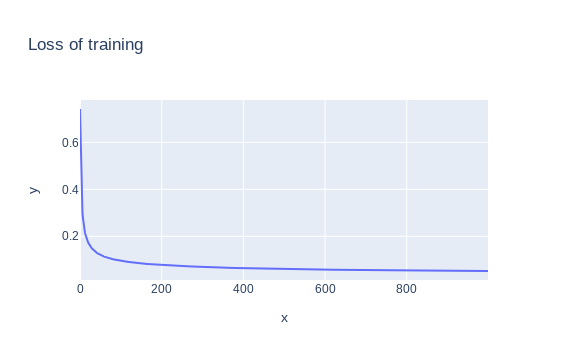

In [154]:
fig = px.line(y=loss_record,title='Loss of training')
fig.show()

Let us test our learned model on the test dataset.

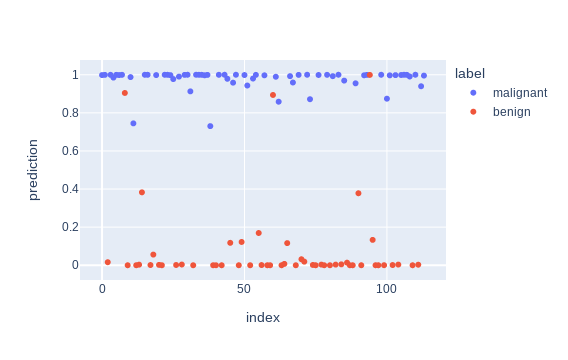

In [155]:
hat_y_test = model(x_test).detach()
label = y_test.squeeze().type(torch.bool)
label = ['malignant' if tmp else 'benign' for tmp in label]

df_pretrain = pd.DataFrame({'prediction':hat_y_test.squeeze(),
                            'label':label
                           }
                          )

fig = px.scatter(data_frame=df_pretrain,
                 y='prediction',
                 color='label',
                 labels={True:'malignant',
                         'benign':False})
fig.show()

After training, the predictions are more reasonable: for malignant cases, our trained model gives high predictions (closer to $1$), and for benign cases, our trained model gives low predictions (closer to $0$).